# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\urllib3\connection.py", line 196, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\socket.py", line 964, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
socket.gaierror: [Errno 11001] getaddrinfo failed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\HP\anaconda3

## Importing the necessary libraries

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [2]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [3]:
# Import the first file - True.csv
true=pd.read_csv("True.csv")
# Import the second file - Fake.csv
fake=pd.read_csv("Fake.csv")

In [4]:
true.head(5)

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [5]:
fake.head(5)

title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [6]:
# Inspect the DataFrame with True News to understand the given data
true.head(5)

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [7]:
# Inspect the DataFrame with Fake News to understand the given data
fake.head(5)

title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [8]:
# Print the column details for True News DataFrame
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [9]:
# Print the column details for Fake News Dataframe
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [10]:
# Print the column names of both DataFrames
true.columns

Index(['title', 'text', 'date'], dtype='object')

In [11]:
fake.columns

Index(['title', 'text', 'date'], dtype='object')

### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [12]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true['news_label']=1
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake['news_label']=0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [13]:
# Combine the true and fake news DataFrames into a single DataFrame
df_merge=pd.concat([true,fake],ignore_index=True)

In [14]:
# Display the first 5 rows of the combined DataFrame to verify the result
df_merge.head(1)

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [15]:
df_merge['news_label'].value_counts()

news_label
0    23523
1    21417
Name: count, dtype: int64

In [16]:
df_merge['news_label'].isnull().sum()

0

In [17]:
df_merge.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44940 entries, 0 to 44939
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44919 non-null  object
 1   text        44919 non-null  object
 2   date        44898 non-null  object
 3   news_label  44940 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [18]:
# Check Presence of Null Values
df_merge.isnull().mean()

title         0.000467
text          0.000467
date          0.000935
news_label    0.000000
dtype: float64

In [19]:
# Handle Rows with Null Values
df_merge1=df_merge[~df_merge['text'].isnull()]

In [20]:
df_merge1.isnull().mean()

title         0.000000
text          0.000000
date          0.000468
news_label    0.000000
dtype: float64

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [21]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
df_merge1['news_text']=df_merge1['title']+' '+df_merge1['text']



In [22]:
# Drop the irrelevant columns from the DataFrame as they are no longer needed

df_merge1.head(1)

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [23]:
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44919 entries, 0 to 44939
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44919 non-null  object
 1   text        44919 non-null  object
 2   date        44898 non-null  object
 3   news_label  44919 non-null  int64 
 4   news_text   44919 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [24]:
# Drop the irrelevant columns from the DataFrame as they are no longer needed
df_merge2=df_merge1.drop(['title','text','date'],axis=1)

In [25]:
# Display the first 5 rows of the updated DataFrame to check the result
df_merge2.head(1)

news_label  \
0           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [26]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

# Add 'news_label' column to the new dataframe for topic identification


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [27]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text=text.lower()
# Remove text in square brackets
    text=re.sub(r'\[.*?]','',text)
# Remove punctuation
    text=text.translate(str.maketrans('','',string.punctuation))
# Remove words with numbers
    text=re.sub(r'\b\w*\d\w*\b','',text)
# Remove extra whitespaces
    text=' '.join(text.split())
    return text

#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [28]:
# Apply the function to clean the news text and remove all unnecessary elements
df_merge2['clean_text']=df_merge2['news_text'].apply(clean_text)


In [29]:
df_merge2.head(1)

news_label  \
0           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [30]:
# Store it in a separate column in the new DataFrame
df_clean = df_merge2.drop(['news_text'],axis=1)

In [31]:
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [32]:
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [33]:
from nltk.tokenize import word_tokenize

In [34]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [35]:
import nltk
nltk.download('punkt', force=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [36]:
import nltk
print(nltk.data.path)

['C:\\Users\\HP/nltk_data', 'C:\\Users\\HP\\anaconda3\\nltk_data', 'C:\\Users\\HP\\anaconda3\\share\\nltk_data', 'C:\\Users\\HP\\anaconda3\\lib\\nltk_data', 'C:\\Users\\HP\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [37]:
nltk.data.path.append('./nltk_data')

In [38]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [39]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
stop_words = set(stopwords.words('english'))

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [41]:
import spacy
from tqdm import tqdm
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")
texts = df_clean['clean_text'].astype(str).tolist()

# Efficient pipeline
docs = list(tqdm(nlp.pipe(texts, batch_size=200, disable=["ner", "parser"]), total=len(texts)))

lemmatized_nouns = []
for doc in docs:
    nouns = [
        token.lemma_.lower() for token in doc
        if token.pos_ == "NOUN" and token.text.lower() not in STOP_WORDS and token.is_alpha
    ]
    lemmatized_nouns.append(' '.join(nouns))

df_clean['lemmatized_text'] = lemmatized_nouns

100%|████████████████████████████████████████████████████████████████████████████| 44919/44919 [42:08<00:00, 17.76it/s]


In [42]:
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [43]:

   # Store it in a separate column in the new DataFrame
##df_clean is new dataframe

### Save the Cleaned data as a csv file (Recommended)

In [44]:
## Recommended to perform the below steps to save time while rerunning the code


In [45]:
# df_clean.to_csv("clean_df.csv", index=False)
df_clean.to_csv("clean_df.csv",index=False)

In [46]:
# df_clean = pd.read_csv("clean_df.csv")
df_clean=pd.read_csv("clean_df.csv")

In [47]:
# Check the first few rows of the DataFrame
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [48]:
# Check the dimensions of the DataFrame
df_clean.shape

(44919, 3)

In [49]:
df_clean.size

134757

In [50]:
# Check the number of non-null entries and data types of each column
df_clean.isnull().mean()

news_label         0.000000
clean_text         0.000200
lemmatized_text    0.000356
dtype: float64

In [51]:
df_clean.isnull().sum()

news_label          0
clean_text          9
lemmatized_text    16
dtype: int64

In [52]:
df_clean['news_label'].value_counts()

news_label
0    23502
1    21417
Name: count, dtype: int64

In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_label       44919 non-null  int64 
 1   clean_text       44910 non-null  object
 2   lemmatized_text  44903 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [54]:
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [55]:
## removing the rows having null values
df_merge_clean=df_clean[~(df_clean['clean_text'].isnull() | df_clean['lemmatized_text'].isnull())]

In [56]:
df_merge_clean.isnull().mean()

news_label         0.0
clean_text         0.0
lemmatized_text    0.0
dtype: float64

In [57]:
df_merge_clean.head(1)

news_label  \
0           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [58]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

In [59]:
# Put all the feature variables in X
X = df_merge_clean.drop('news_label', axis=1)
# Put the target variable in y
y = df_merge_clean[['news_label']]
X.shape, y.shape

((44903, 2), (44903, 1))

In [60]:
y.value_counts()

news_label
0             23486
1             21417
Name: count, dtype: int64

In [61]:
# Split the dataset into 70% train and 30% validation and use stratification on the target variable
X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=0.7, random_state =47, stratify=y)

In [62]:

#Reset index for all train test sets
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(31432, 2) (13471, 2) (31432, 1) (13471, 1)


In [63]:
y_test.head()


news_label
0           1
1           1
2           1
3           1
4           0

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [64]:
# Add a new column to calculate the character length of cleaned news text
X_train['clean_text_length'] = X_train['clean_text'].str.len()

In [65]:
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
X_train['lemmatized_text_length'] = X_train['lemmatized_text'].str.len()

In [66]:
X_train.head()

clean_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [67]:
# Create a histogram plot to visualise character lengths


In [68]:
# Add histogram for cleaned news text
import seaborn as sns

sns.histplot(x=X_train['clean_text_length'])


<Axes: xlabel='clean_text_length', ylabel='Count'>

In [69]:
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(x=X_train['lemmatized_text_length'])

<Axes: xlabel='lemmatized_text_length', ylabel='Count'>

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [70]:
y_train.head()

news_label
0           1
1           0
2           0
3           1
4           0

In [71]:
X_train.head()

clean_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [72]:
## merge X_train and y_train
df_merge_train=pd.concat([X_train,y_train],axis=1)

In [73]:
df_merge_train.head()

clean_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [74]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news_train = df_merge_train[df_merge_train['news_label'] == 1].copy()



In [75]:
# Convert 'clean_text' to string and handle non-string values safely
true_news_train['clean_text'] = true_news_train['clean_text'].astype(str)

In [76]:
# Convert 'lemmatised_text' to string and handle non-string values safely
true_news_train['lemmatized_text'] = true_news_train['lemmatized_text'].astype(str)

In [77]:
true_news_train.head(1)

clean_text  \
0  speaker ryan declining to prosecute clinton bad precedent washington reuters us house of representatives speaker paul ryan on tuesday attacked the decision by fbi director james comey to not recommend charges against democrat hillary clinton for use of a private email server saying it “defies explanation” “declining to prosecute secretary clinton for recklessly mishandling and transmitting national security information will set a terrible precedent” ryan a republican said in a statement “the findings of this investigation also make clear that secretary clinton misled the american people when she was confronted with her criminal actions”   

                                                                                                                                     lemmatized_text  \
0  representative decision director charge use email server explanation security information precedent statement finding investigation people action   

   clean_text_length  lemmatized_text_length  news_label  
0                644                     145           1

In [78]:
# Combine all cleaned text into one large string
text = ' '.join(true_news_train['clean_text'])

In [79]:
# Combine all lemmatized text into one large string
text_lemmatized = ' '.join(true_news_train['lemmatized_text'])

In [80]:
# Generate word cloud for True News


In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [82]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400,
                      max_words=40,
                      background_color='white',
                      colormap='viridis').generate(text)

In [83]:
# Create a WordCloud object
wordcloud_lemmatized = WordCloud(width=800, height=400,
                      max_words=40,
                      background_color='white',
                      colormap='viridis').generate(text_lemmatized)

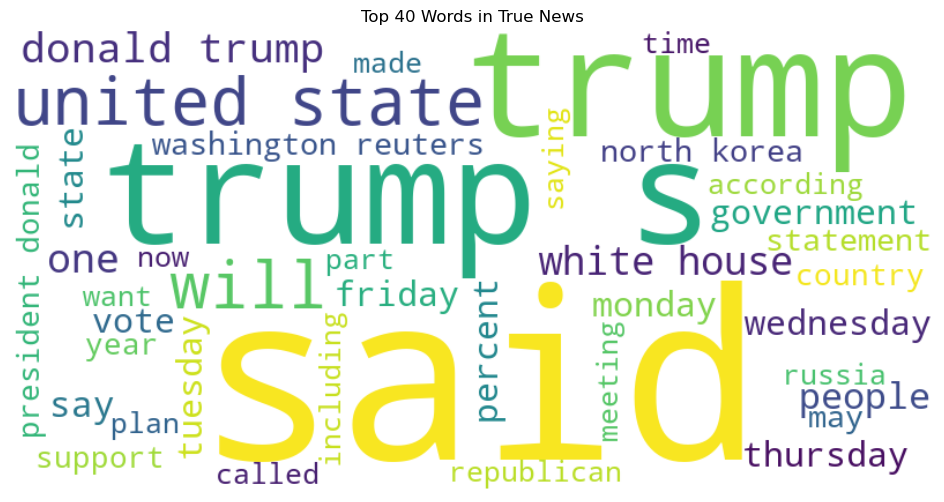

In [84]:
# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News')
plt.show()

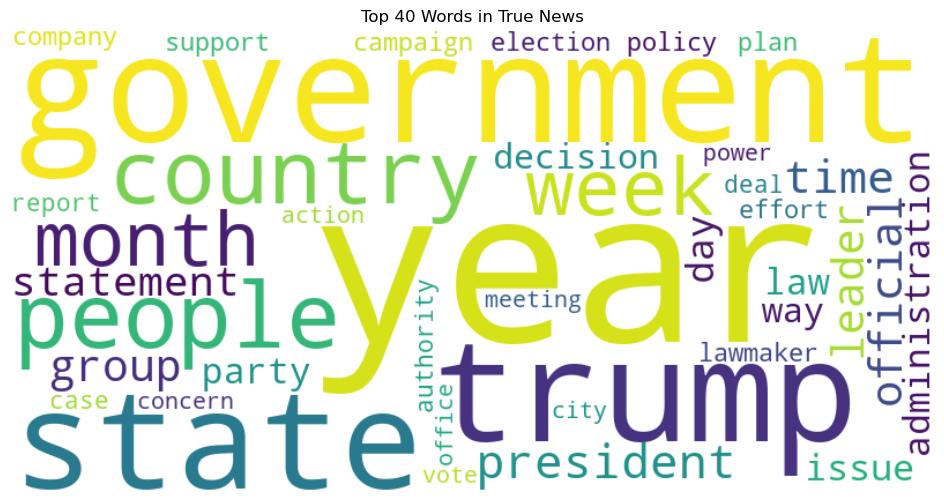

In [85]:
# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_lemmatized, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [86]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text







In [87]:
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

fake_news_train = df_merge_train[df_merge_train['news_label'] == 0].copy()

In [88]:
# Convert 'clean_text' to string and handle non-string values safely
fake_news_train['clean_text'] = fake_news_train['clean_text'].astype(str)

In [89]:
# Convert 'lemmatised_text' to string and handle non-string values safely
fake_news_train['lemmatized_text'] = fake_news_train['lemmatized_text'].astype(str)

In [90]:
# Combine all cleaned text into one large string
text_f = ' '.join(fake_news_train['clean_text'])

In [91]:
# Combine all lemmatized text into one large string
text_lemmatized_f = ' '.join(fake_news_train['lemmatized_text'])

In [92]:
# Generate word cloud for Fake News


In [93]:
# Create a WordCloud object
wordcloud_f = WordCloud(width=800, height=400,
                      max_words=40,
                      background_color='white',
                      colormap='viridis').generate(text_f)

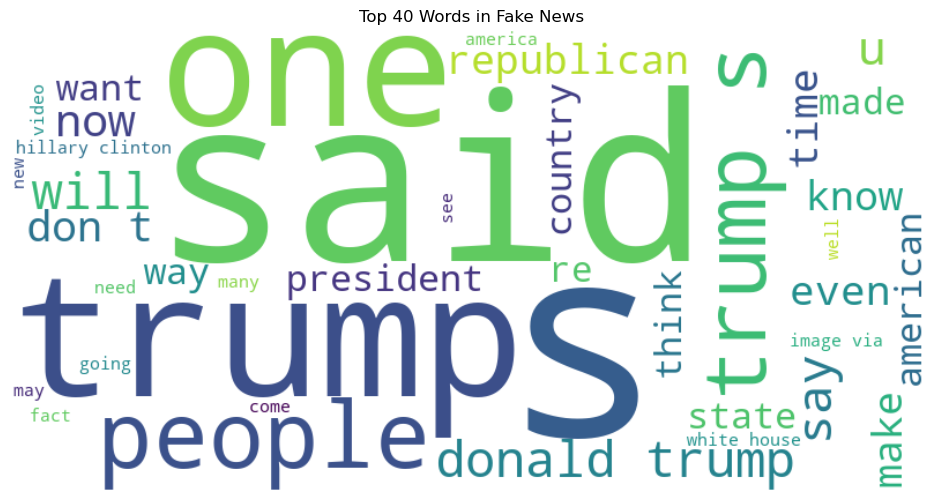

In [94]:
# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_f, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News')
plt.show()

In [95]:
# Create a WordCloud object
wordcloud_lemmatized_f = WordCloud(width=800, height=400,
                      max_words=40,
                      background_color='white',
                      colormap='viridis').generate(text_lemmatized_f)

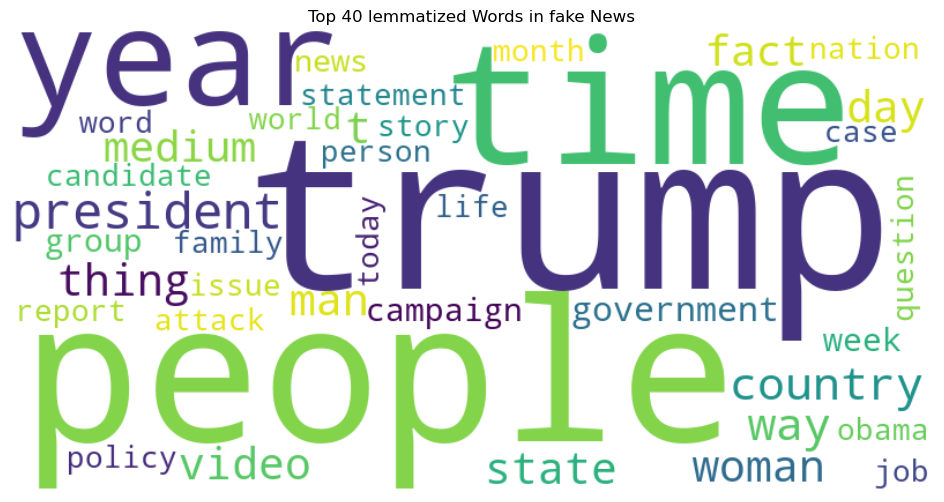

In [96]:
# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_lemmatized_f, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 lemmatized Words in fake News')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [97]:
# Write a function to get the specified top n-grams


In [98]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import pandas as pd

In [99]:
def get_top_ngrams(corpus, ngram_range=(1, 1), top_n=20, stop_words='english'):
    """
    Returns top n n-grams (unigrams, bigrams, or trigrams) from a list of text documents.
    
    Parameters:
    - corpus: list or Pandas Series of text
    - ngram_range: tuple (min_n, max_n), e.g., (1,1) for unigrams
    - top_n: number of top n-grams to return
    - stop_words: 'english', custom list, or None
    
    Returns:
    - DataFrame with n-grams and frequencies
    """
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words)
    X = vec.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    
    return pd.DataFrame(sorted_words, columns=['ngram', 'frequency'])

In [100]:
## FOR TRUE NEWS
# Unigrams
top_unigrams_true = get_top_ngrams(true_news_train['lemmatized_text'], ngram_range=(1, 1), top_n=10)

# Bigrams
top_bigrams_true = get_top_ngrams(true_news_train['lemmatized_text'], ngram_range=(2, 2), top_n=10)

# Trigrams
top_trigrams_true = get_top_ngrams(true_news_train['lemmatized_text'], ngram_range=(3, 3), top_n=10)

In [101]:
## FOR TRUE NEWS
# Unigrams
top_unigrams_fake = get_top_ngrams(fake_news_train['lemmatized_text'], ngram_range=(1, 1), top_n=10)

# Bigrams
top_bigrams_fake = get_top_ngrams(fake_news_train['lemmatized_text'], ngram_range=(2, 2), top_n=10)

# Trigrams
top_trigrams_fake = get_top_ngrams(fake_news_train['lemmatized_text'], ngram_range=(3, 3), top_n=10)

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [102]:
# Handle NaN values in the text data


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [103]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
print("Top 10 Unigrams in True News:\n")
print(top_unigrams_true)

Top 10 Unigrams in True News:

        ngram  frequency
0       trump      24572
1       state      14536
2  government      13747
3        year      13159
4      people      10680
5    election      10124
6     country       9765
7    official       9301
8       party       8591
9    campaign       7929


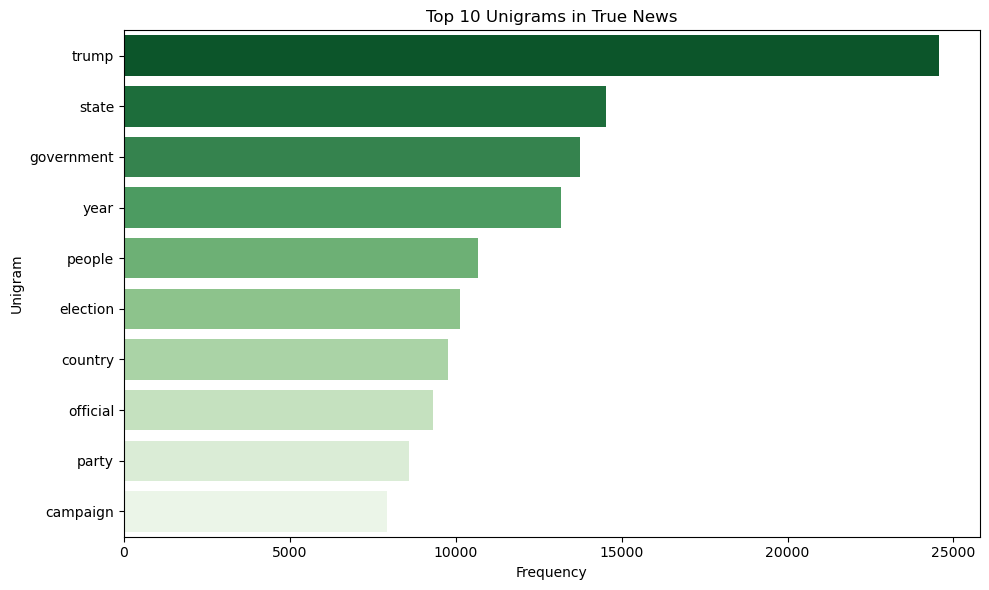

In [104]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_unigrams_true, x='frequency', y='ngram', palette='Greens_r')
plt.title("Top 10 Unigrams in True News")
plt.xlabel("Frequency")
plt.ylabel("Unigram")
plt.tight_layout()
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [105]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
print("Top 10 bigrams in True News:\n")
print(top_bigrams_true)

Top 10 bigrams in True News:

                  ngram  frequency
0        trump campaign       1164
1       news conference        965
2        climate change        749
3       request comment        739
4       percent percent        718
5        security force        693
6  trump administration        672
7            tax reform        666
8  house representative        644
9   intelligence agency        616


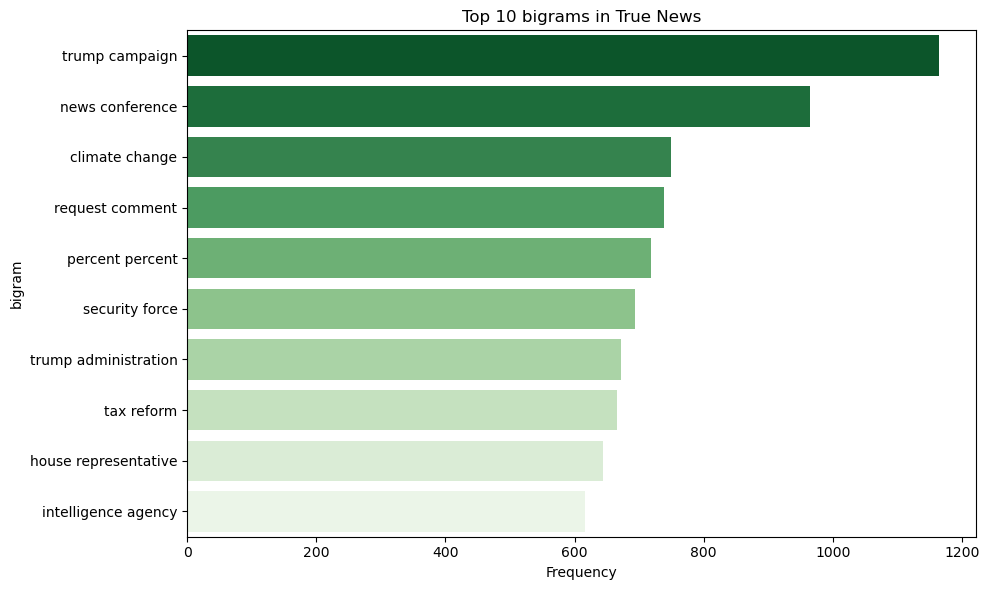

In [106]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_bigrams_true, x='frequency', y='ngram', palette='Greens_r')
plt.title("Top 10 bigrams in True News")
plt.xlabel("Frequency")
plt.ylabel("bigram")
plt.tight_layout()
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [107]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
print("Top 10 trigrams in True News:\n")
print(top_trigrams_true)

Top 10 trigrams in True News:

                             ngram  frequency
0     official condition anonymity        246
1            trump transition team        166
2                 tax rate percent        158
3        state department official        127
4        article staff involvement        123
5       staff involvement creation        123
6  involvement creation production        123
7                 use email server        117
8                 trump travel ban        105
9             rate percent percent        100


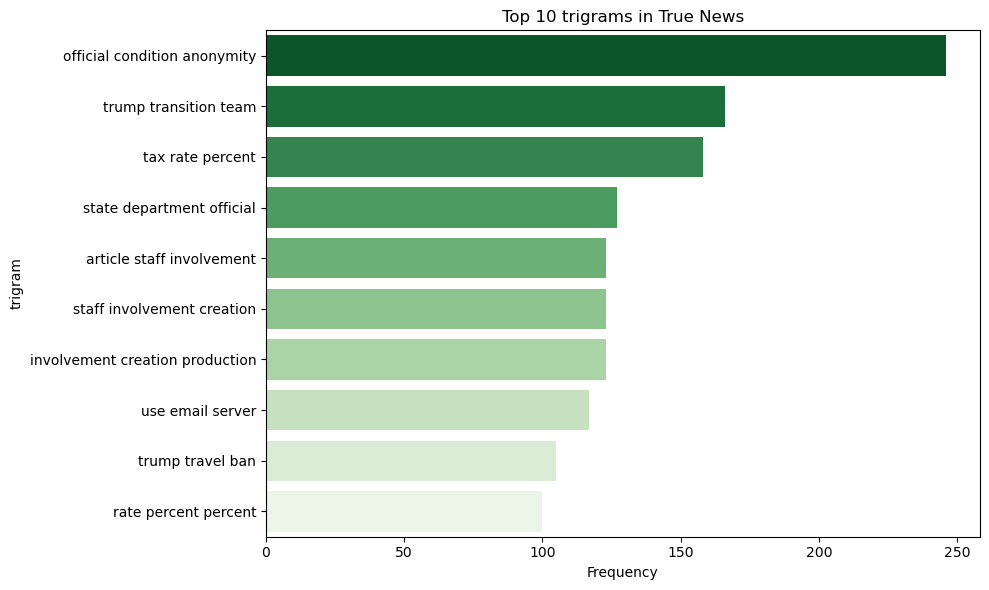

In [108]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_trigrams_true, x='frequency', y='ngram', palette='Greens_r')
plt.title("Top 10 trigrams in True News")
plt.xlabel("Frequency")
plt.ylabel("trigram")
plt.tight_layout()
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [109]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
print("Top 10 Unigrams in Fake News:\n")
print(top_unigrams_fake)

Top 10 Unigrams in Fake News:

       ngram  frequency
0      trump      34839
1     people      18564
2       time      11223
3       year      10600
4  president      10121
5      image       9775
6      state       9132
7      woman       8266
8      video       8034
9   campaign       7862


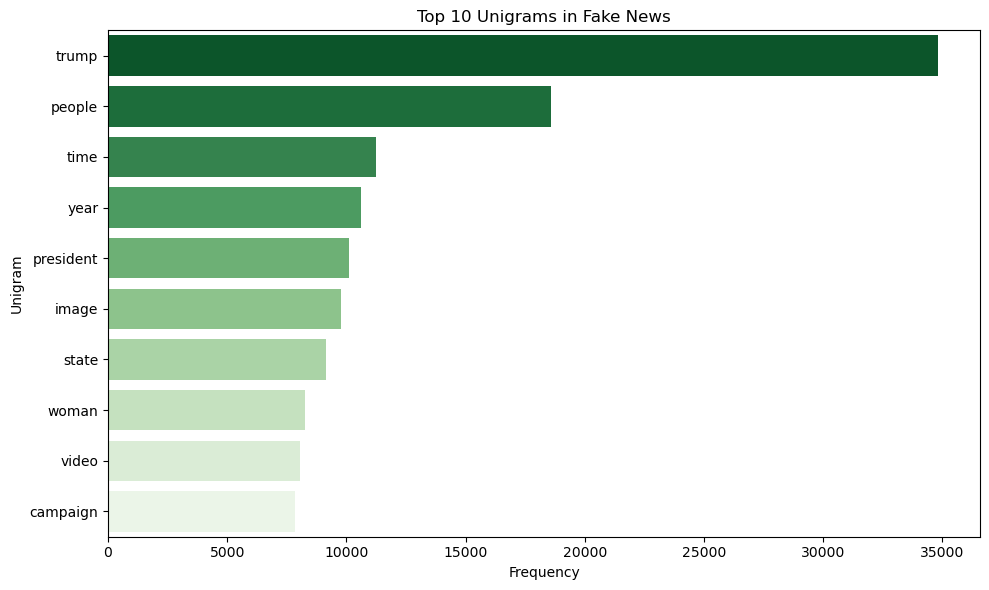

In [110]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_unigrams_fake, x='frequency', y='ngram', palette='Greens_r')
plt.title("Top 10 Unigrams in Fake News")
plt.xlabel("Frequency")
plt.ylabel("Unigram")
plt.tight_layout()
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [111]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
print("Top 10 bigrams in Fake News:\n")
print(top_bigrams_fake)

Top 10 bigrams in Fake News:

                   ngram  frequency
0        trump supporter       1465
1            image image       1311
2           century wire       1222
3         trump campaign       1222
4         police officer       1207
5        law enforcement       1130
6         screen capture        963
7           donald trump        911
8  trump realdonaldtrump        778
9         climate change        767


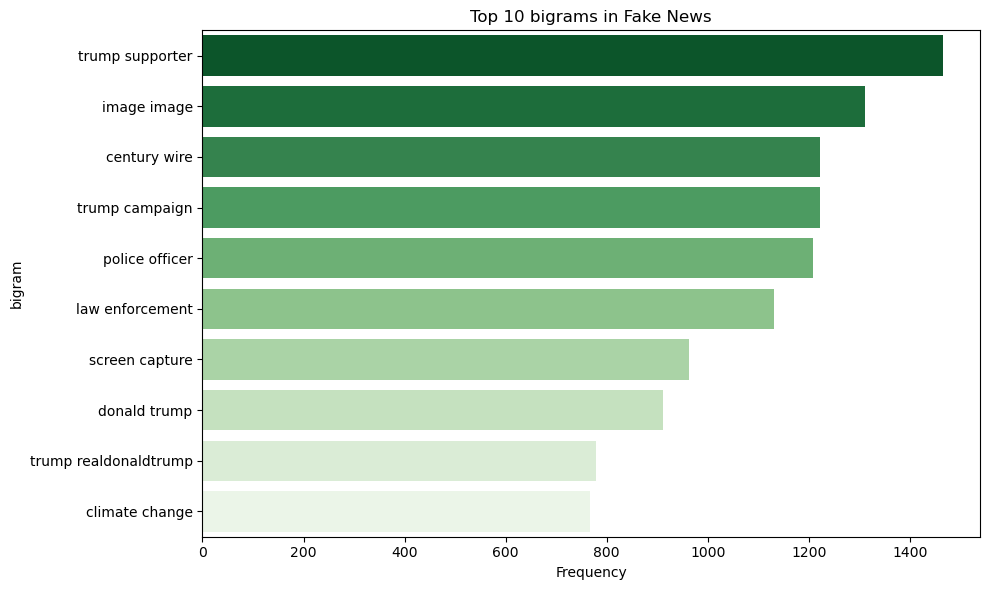

In [112]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_bigrams_fake, x='frequency', y='ngram', palette='Greens_r')
plt.title("Top 10 bigrams in Fake News")
plt.xlabel("Frequency")
plt.ylabel("bigram")
plt.tight_layout()
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



In [113]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
print("Top 10 trigrams in Fake News:\n")
print(top_trigrams_fake)

Top 10 trigrams in Fake News:

                     ngram  frequency
0        news century wire        613
1     video screen capture        511
2       image video screen        474
3        image getty image        346
4     image screen capture        331
5         image chip image        186
6        century wire file        176
7   image video screenshot        156
8  law enforcement officer        152
9    broadcast boiler room        151


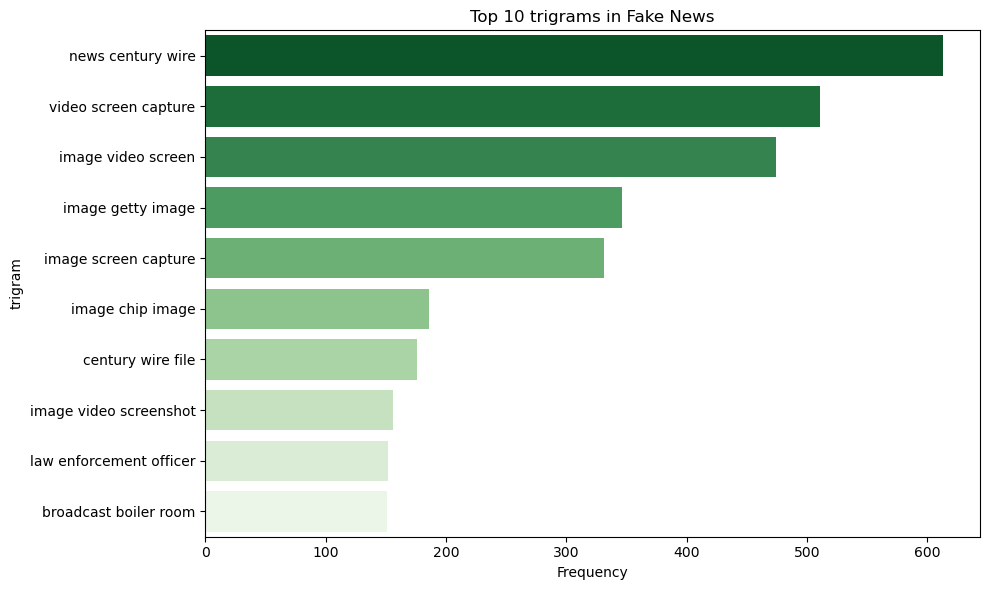

In [114]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_trigrams_fake, x='frequency', y='ngram', palette='Greens_r')
plt.title("Top 10 trigrams in Fake News")
plt.xlabel("Frequency")
plt.ylabel("trigram")
plt.tight_layout()
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [115]:

# Add a new column to calculate the character length of cleaned news text
X_test['clean_text_length'] = X_test['clean_text'].str.len()

In [116]:
# Add a new column to calculate the character length of lemmatized news text with POS tags removed
X_test['lemmatized_text_length'] = X_test['lemmatized_text'].str.len()

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [117]:
# Create a histogram plot to visualise character lengths




<Axes: xlabel='clean_text_length', ylabel='Count'>

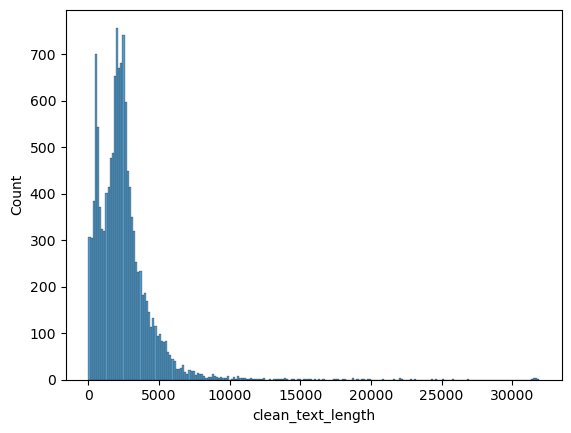

In [118]:
# Add histogram for cleaned news text

sns.histplot(x=X_test['clean_text_length'])

<Axes: xlabel='lemmatized_text_length', ylabel='Count'>

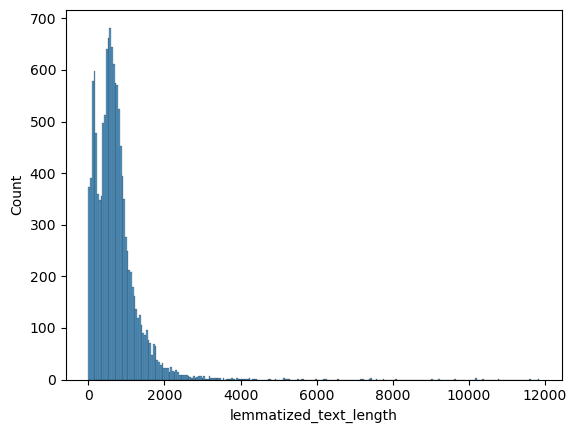

In [119]:

# Add histogram for lemmatized news text with POS tags removed
sns.histplot(x=X_test['lemmatized_text_length'])

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [120]:
y_test.head()

news_label
0           1
1           1
2           1
3           1
4           0

In [121]:
X_test.head()

clean_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              a modest bump for clinton in online wagering hours after debate new york reuters democratic presidential nominee hillary clinton’s probability of winning the white house got a modest bump in online betting markets on tuesday a day after her debate with republican donald trump the price for a contract favoring clinton on the popular predictit betting market was up cents from monday’s postdebate closing and implied a percent probability that she would win the nov election although during the debate clinton was as high as percent her monday night closing of matched the highest closing number since her health took a stumble on sept a protrump contract on tuesday indicated his probabilit

In [122]:
## merge X_train and y_train
df_merge_test=pd.concat([X_test,y_test],axis=1)

In [123]:
df_merge_test.head()

clean_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              a modest bump for clinton in online wagering hours after debate new york reuters democratic presidential nominee hillary clinton’s probability of winning the white house got a modest bump in online betting markets on tuesday a day after her debate with republican donald trump the price for a contract favoring clinton on the popular predictit betting market was up cents from monday’s postdebate closing and implied a percent probability that she would win the nov election although during the debate clinton was as high as percent her monday night closing of matched the highest closing number since her health took a stumble on sept a protrump contract on tuesday indicated his probabilit

In [124]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News
true_news_test = df_merge_test[df_merge_test['news_label'] == 1].copy()

In [125]:
# Convert 'clean_text' to string and handle non-string values safely
true_news_test['clean_text'] = true_news_test['clean_text'].astype(str)

In [126]:
# Convert 'lemmatised_text' to string and handle non-string values safely
true_news_test['lemmatized_text'] = true_news_test['lemmatized_text'].astype(str)

In [127]:
true_news_test.head(1)

clean_text  \
0  a modest bump for clinton in online wagering hours after debate new york reuters democratic presidential nominee hillary clinton’s probability of winning the white house got a modest bump in online betting markets on tuesday a day after her debate with republican donald trump the price for a contract favoring clinton on the popular predictit betting market was up cents from monday’s postdebate closing and implied a percent probability that she would win the nov election although during the debate clinton was as high as percent her monday night closing of matched the highest closing number since her health took a stumble on sept a protrump contract on tuesday indicated his probability for victory was percent trading in both contracts remained brisk on the heels of the first of three debates predictit contracts are priced from to cents with the contract price equating to a probability a candidate will win the election initially the price swings for both candidates were the largest since early august though a substantial portion of clinton’s gain and trump’s fall had been retraced by early afternoon on tuesday the swing following the debate put the brakes on a big trump price rally on predictit that coincided with a tightening in most public opinion polls on predictit the implied probability of him winning had risen to percent heading into the debate from percent at the end of august clinton’s prospects also showed comparable improvement on betting sites based in ireland and the united kingdom ukbased betfair called the debate for clinton based on odds movements on its platform where more than million pounds were bet during the event the implied probability of a clinton win in november climbed to percent on betfair the strongest it has been since her prospects took a hit over her pneumonia diagnosis this month trump’s probability fell to percent from percent on ireland’s paddypower clinton’s odds also had shortened or improved to from in the early moments of monday’s debate trump’s odds which initially lengthened following the debate had shortened modestly to   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  lemmatized_text  \
0  bump wagering hour nominee probability bump market day debate price contract predictit market cent postdebate closing percent probability election debate percent night closing closing number health stumble protrump contract probability victory percent trading contract heel debate predictit contract cent contract price equating probability candidate election price swing candidate portion gain trump fall afternoon swing debate brake trump price rally predictit tightening opinion poll predictit probability percent debate percent end prospect improvement site betfair debate odd movement platform pound event probability win percent betfair prospect hit pneumonia diagnosis month trump probability percent percent odd moment debate trump odd debate   

   clean_text_length  lemmatized_text_length  news_label  
0               2092                     750           1

In [128]:
# Combine all cleaned text into one large string
text = ' '.join(true_news_test['clean_text'])

In [129]:
# Combine all lemmatized text into one large string
text_lemmatized = ' '.join(true_news_test['lemmatized_text'])

In [130]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400,
                      max_words=40,
                      background_color='white',
                      colormap='viridis').generate(text)

In [131]:
# Create a WordCloud object
wordcloud_lemmatized = WordCloud(width=800, height=400,
                      max_words=40,
                      background_color='white',
                      colormap='viridis').generate(text_lemmatized)

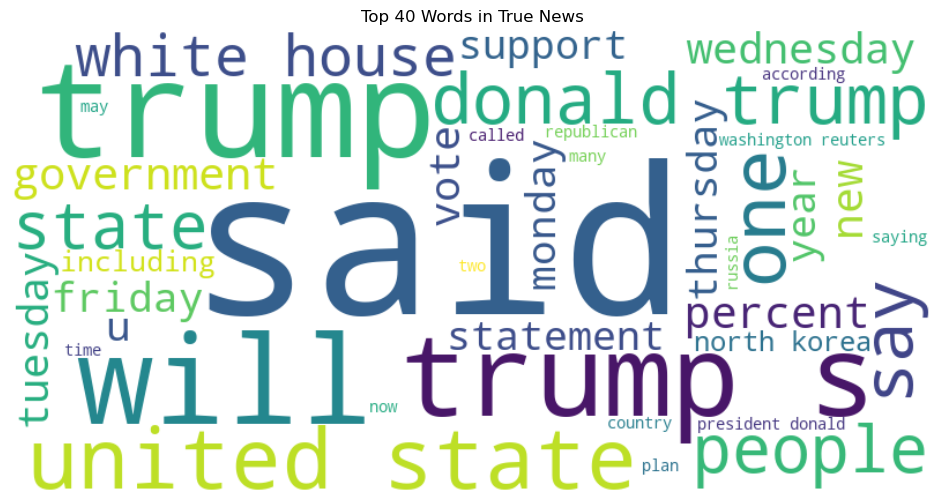

In [132]:
# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News')
plt.show()

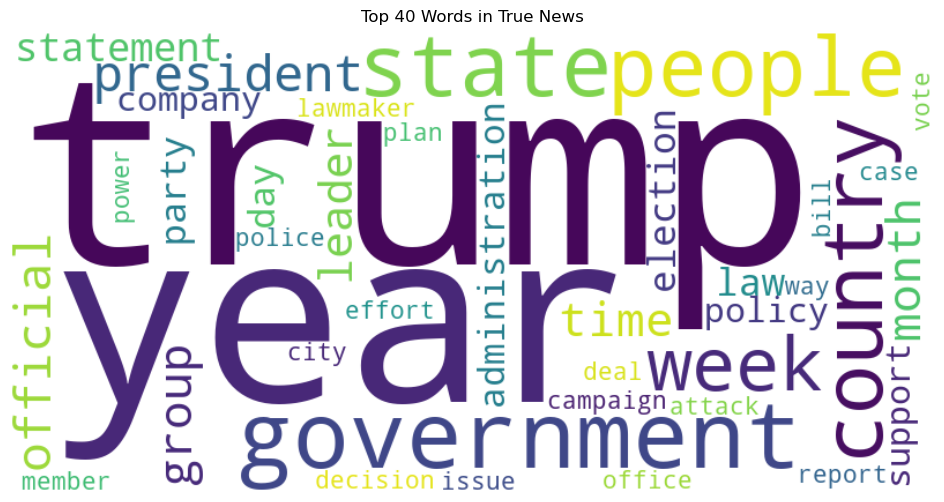

In [133]:
# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_lemmatized, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News')
plt.show()

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [134]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News

In [135]:
# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

fake_news_test = df_merge_test[df_merge_test['news_label'] == 0].copy()

In [136]:
# Convert 'clean_text' to string and handle non-string values safely
fake_news_test['clean_text'] = fake_news_test['clean_text'].astype(str)

In [137]:
# Convert 'lemmatised_text' to string and handle non-string values safely
fake_news_test['lemmatized_text'] = fake_news_test['lemmatized_text'].astype(str)

In [138]:
# Combine all cleaned text into one large string
text_f = ' '.join(fake_news_test['clean_text'])

In [139]:
# Combine all lemmatized text into one large string
text_lemmatized_f = ' '.join(fake_news_test['lemmatized_text'])

In [140]:
# Generate word cloud for Fake News

In [141]:
# Create a WordCloud object
wordcloud_f = WordCloud(width=800, height=400,
                      max_words=40,
                      background_color='white',
                      colormap='viridis').generate(text_f)

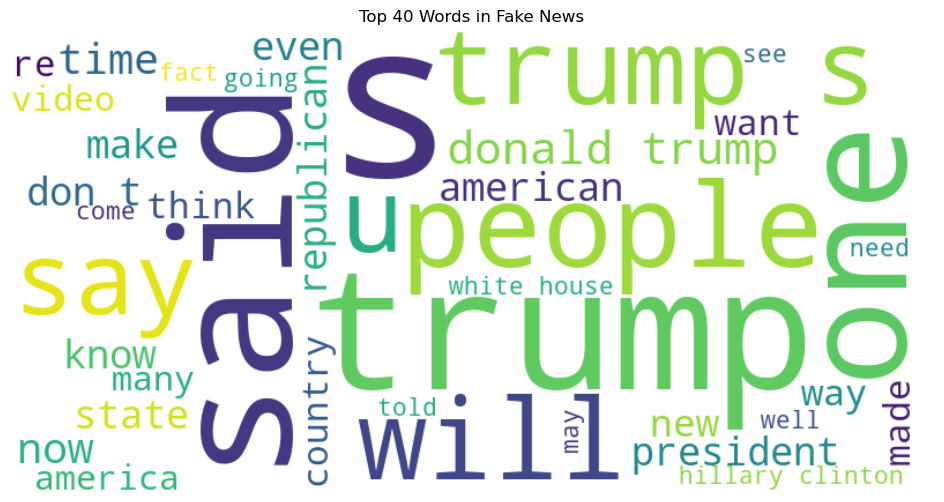

In [142]:
# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_f, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News')
plt.show()

In [143]:
# Create a WordCloud object
wordcloud_lemmatized_f = WordCloud(width=800, height=400,
                      max_words=40,
                      background_color='white',
                      colormap='viridis').generate(text_lemmatized_f)

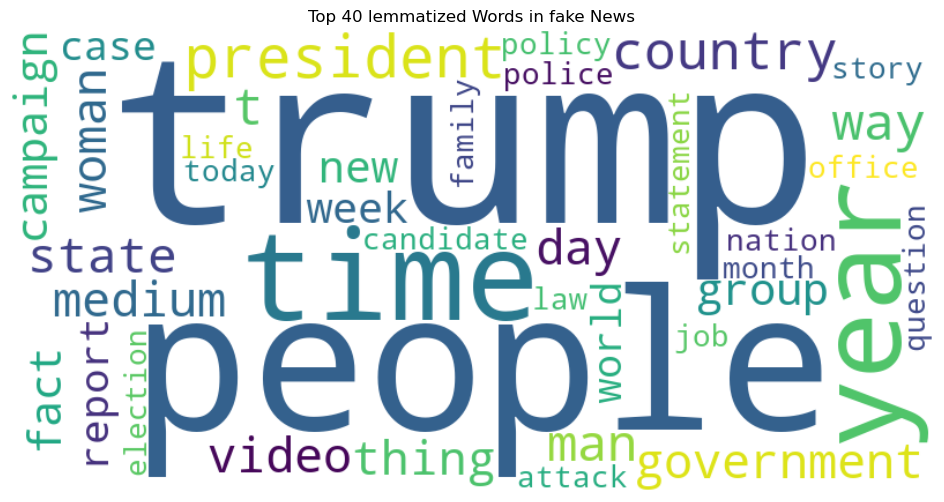

In [144]:
# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_lemmatized_f, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 lemmatized Words in fake News')
plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [145]:
## Write a function to get the specified top n-grams
def get_top_ngrams(corpus, ngram_range=(1, 1), top_n=20, stop_words='english'):
    """
    Returns top n n-grams (unigrams, bigrams, or trigrams) from a list of text documents.
    
    Parameters:
    - corpus: list or Pandas Series of text
    - ngram_range: tuple (min_n, max_n), e.g., (1,1) for unigrams
    - top_n: number of top n-grams to return
    - stop_words: 'english', custom list, or None
    
    Returns:
    - DataFrame with n-grams and frequencies
    """
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words)
    X = vec.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    
    return pd.DataFrame(sorted_words, columns=['ngram', 'frequency'])

In [146]:
## FOR TRUE NEWS
# Unigrams
top_unigrams_true_test = get_top_ngrams(true_news_test['lemmatized_text'], ngram_range=(1, 1), top_n=10)

# Bigrams
top_bigrams_true_test = get_top_ngrams(true_news_test['lemmatized_text'], ngram_range=(2, 2), top_n=10)

# Trigrams
top_trigrams_true_test = get_top_ngrams(true_news_test['lemmatized_text'], ngram_range=(3, 3), top_n=10)

In [147]:
## FOR FAKE NEWS
# Unigrams
top_unigrams_fake_test = get_top_ngrams(fake_news_test['lemmatized_text'], ngram_range=(1, 1), top_n=10)

# Bigrams
top_bigrams_fake_test = get_top_ngrams(fake_news_test['lemmatized_text'], ngram_range=(2, 2), top_n=10)

# Trigrams
top_trigrams_fake_test = get_top_ngrams(fake_news_test['lemmatized_text'], ngram_range=(3, 3), top_n=10)

##### 5.3.2 Handle the NaN values

In [148]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [149]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
print("Top 10 Unigrams in True News:\n")
print(top_unigrams_true_test)

Top 10 Unigrams in True News:

        ngram  frequency
0       trump      10593
1  government       5939
2       state       5885
3        year       5807
4      people       4660
5     country       4312
6    election       4125
7    official       3986
8       group       3276
9       party       3253


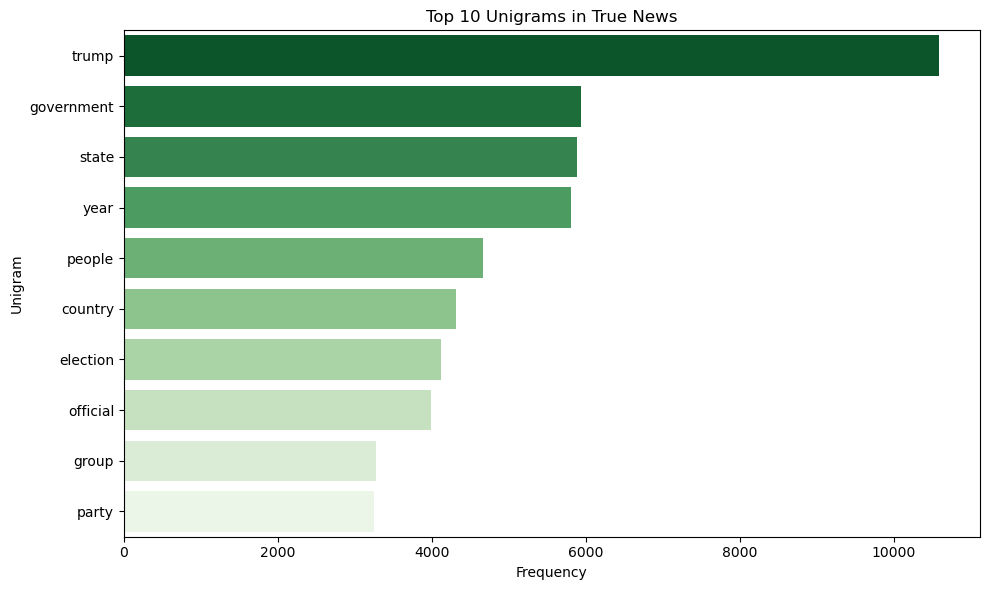

In [150]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_unigrams_true_test, x='frequency', y='ngram', palette='Greens_r')
plt.title("Top 10 Unigrams in True News")
plt.xlabel("Frequency")
plt.ylabel("Unigram")
plt.tight_layout()
plt.show()

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [151]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
print("Top 10 bigrams in True News:\n")
print(top_bigrams_true_test)

Top 10 bigrams in True News:

                  ngram  frequency
0        trump campaign        555
1       news conference        416
2            tax reform        354
3       percent percent        314
4  trump administration        310
5        security force        308
6       request comment        296
7   intelligence agency        280
8        climate change        267
9      attorney general        265


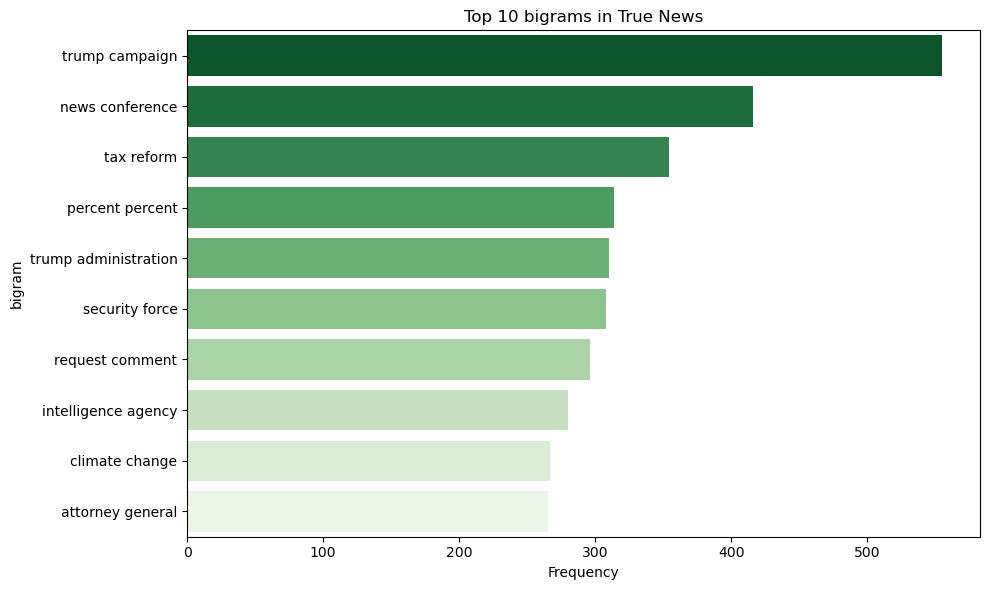

In [152]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_bigrams_true_test, x='frequency', y='ngram', palette='Greens_r')
plt.title("Top 10 bigrams in True News")
plt.xlabel("Frequency")
plt.ylabel("bigram")
plt.tight_layout()
plt.show()

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [153]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
print("Top 10 trigrams in True News:\n")
print(top_trigrams_true_test)

Top 10 trigrams in True News:

                             ngram  frequency
0     official condition anonymity         89
1            trump transition team         81
2                 tax rate percent         79
3             rate percent percent         60
4        article staff involvement         57
5       staff involvement creation         57
6  involvement creation production         57
7        state department official         48
8                  income tax rate         46
9          percent percent percent         43


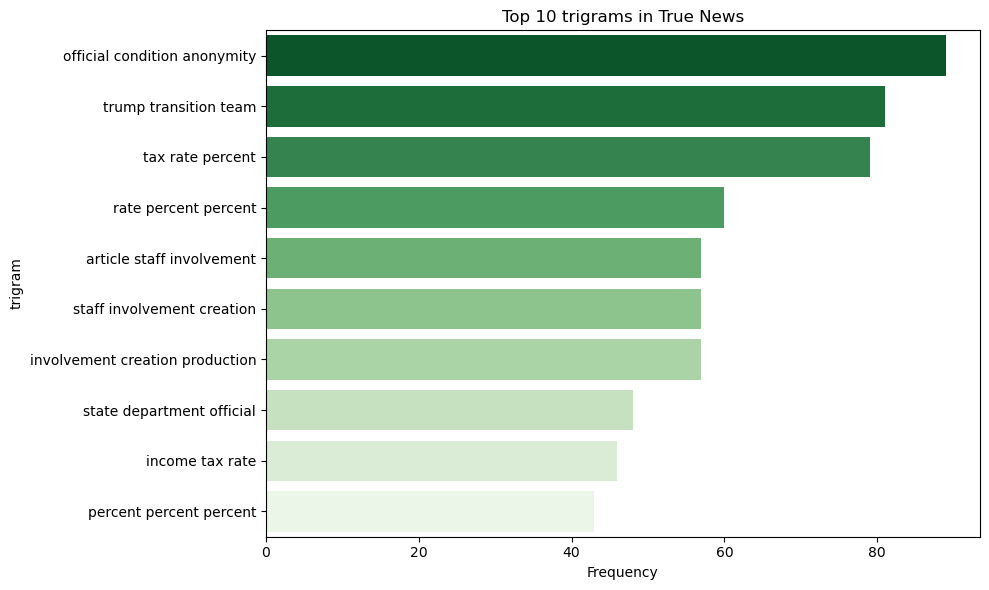

In [154]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_trigrams_true_test, x='frequency', y='ngram', palette='Greens_r')
plt.title("Top 10 trigrams in True News")
plt.xlabel("Frequency")
plt.ylabel("trigram")
plt.tight_layout()
plt.show()

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [155]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
print("Top 10 Unigrams in Fake News:\n")
print(top_unigrams_fake_test)

Top 10 Unigrams in Fake News:

       ngram  frequency
0      trump      14827
1     people       7823
2       time       4856
3  president       4439
4       year       4415
5      image       4112
6      state       3872
7      video       3516
8      woman       3435
9       news       3380


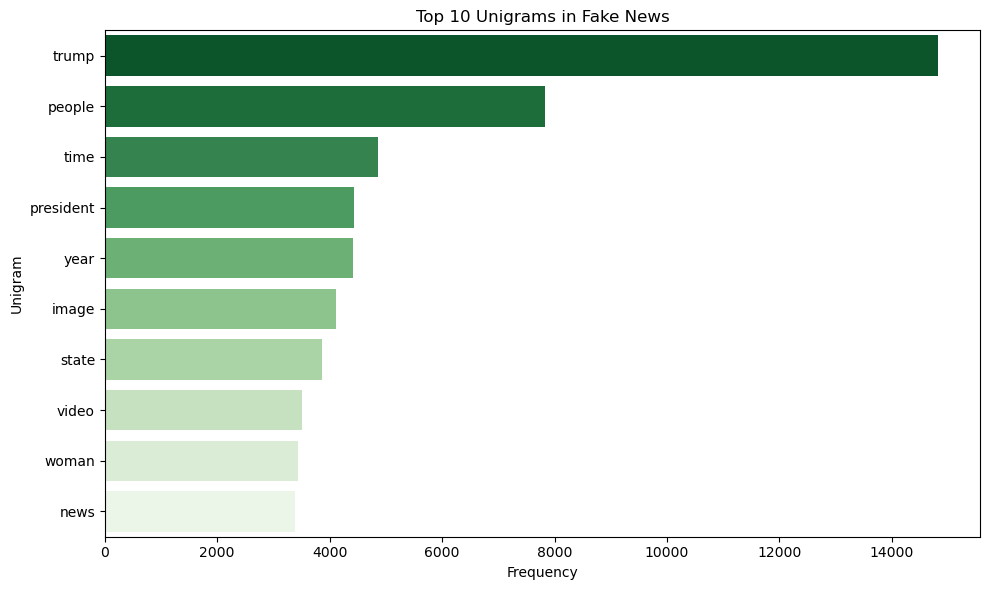

In [156]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_unigrams_fake_test, x='frequency', y='ngram', palette='Greens_r')
plt.title("Top 10 Unigrams in Fake News")
plt.xlabel("Frequency")
plt.ylabel("Unigram")
plt.tight_layout()
plt.show()

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [157]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
print("Top 10 bigrams in Fake News:\n")
print(top_bigrams_fake_test)

Top 10 bigrams in Fake News:

                   ngram  frequency
0        trump supporter        615
1            image image        580
2           century wire        500
3         police officer        493
4         trump campaign        446
5        law enforcement        434
6           donald trump        392
7         screen capture        370
8      mainstream medium        352
9  trump realdonaldtrump        321


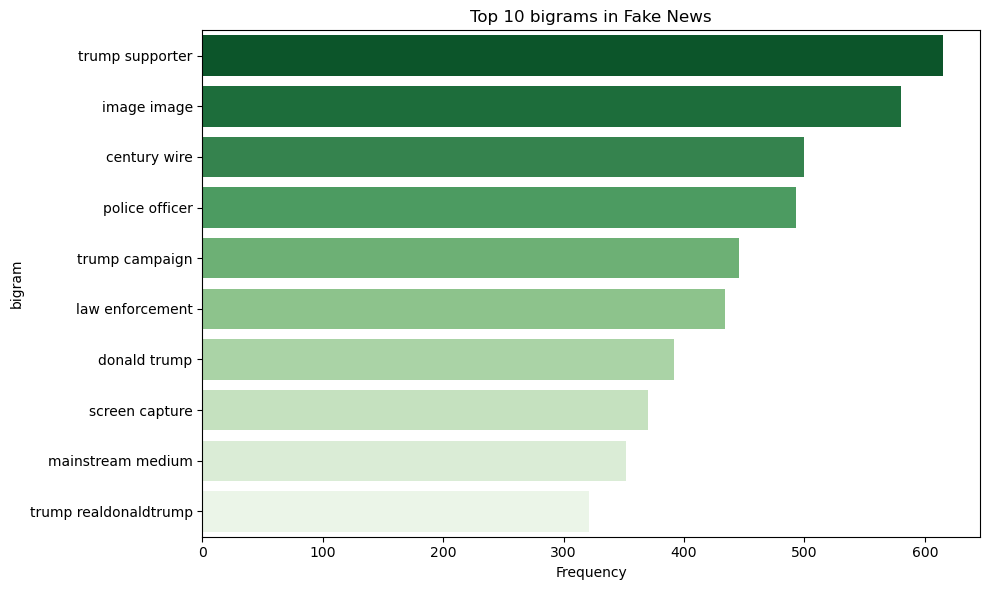

In [158]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_bigrams_fake_test, x='frequency', y='ngram', palette='Greens_r')
plt.title("Top 10 bigrams in Fake News")
plt.xlabel("Frequency")
plt.ylabel("bigram")
plt.tight_layout()
plt.show()

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [159]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
print("Top 10 trigrams in Fake News:\n")
print(top_trigrams_fake_test)

Top 10 trigrams in Fake News:

                     ngram  frequency
0        news century wire        264
1     video screen capture        217
2       image video screen        188
3        image getty image        156
4     image screen capture        116
5  law enforcement officer         81
6   image video screenshot         75
7         image chip image         69
8        century wire file         66
9        radio network acr         64


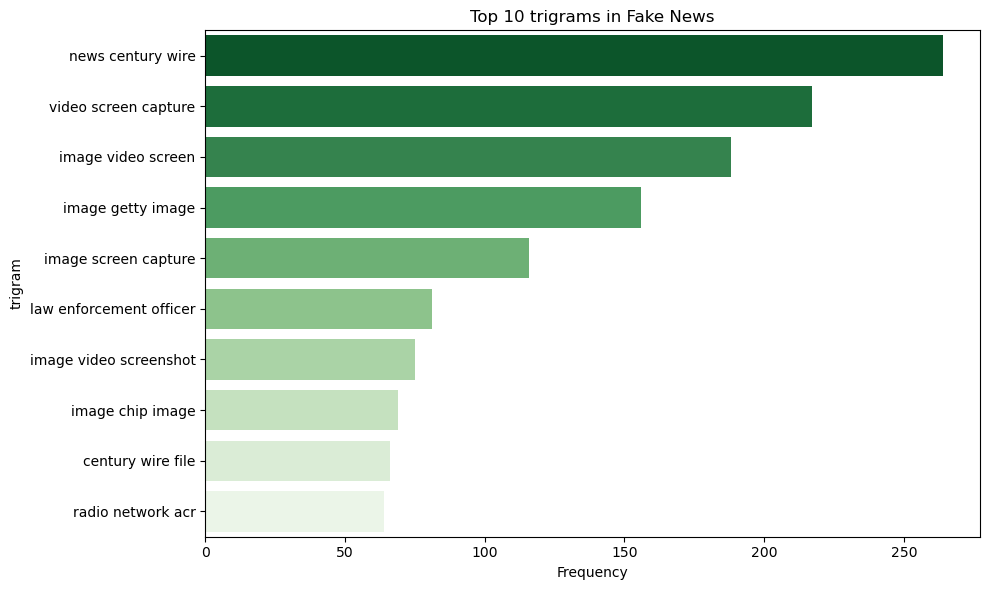

In [160]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_trigrams_fake_test, x='frequency', y='ngram', palette='Greens_r')
plt.title("Top 10 trigrams in Fake News")
plt.xlabel("Frequency")
plt.ylabel("trigram")
plt.tight_layout()
plt.show()

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [161]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim

In [162]:
import gensim.downloader as api

In [163]:
model_path = 'GoogleNews-vectors-negative300.bin.gz'

In [164]:
w2v_model = api.load("word2vec-google-news-300")

In [165]:
print(w2v_model['king'].shape)

(300,)


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [166]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

import numpy as np

def get_w2v_features(text_series, model, vector_size=300):
    """
    Convert a Series of text into average Word2Vec vectors.
    
    Parameters:
    - text_series: pd.Series of cleaned text (tokenized or raw)
    - model: pretrained Word2Vec model (like Google News)
    - vector_size: dimension of Word2Vec embeddings (default 300)
    
    Returns:
    - numpy array of shape (n_samples, vector_size)
    """
    features = []

    for sentence in text_series:
        if isinstance(sentence, str):
            tokens = sentence.split()  # assumes space-separated tokens
            valid_tokens = [word for word in tokens if word in model]

            if valid_tokens:
                vector = np.mean([model[word] for word in valid_tokens], axis=0)
            else:
                vector = np.zeros(vector_size)
        else:
            vector = np.zeros(vector_size)

        features.append(vector)

    return np.array(features)



In [167]:
X_train_w2v = get_w2v_features(df_merge_train['lemmatized_text'], w2v_model)
X_test_w2v = get_w2v_features(df_merge_test['lemmatized_text'], w2v_model)

In [168]:
## Extract the target variable for the training data and validation data
y_train = df_merge_train['news_label'].values
y_test = df_merge_test['news_label'].values

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [170]:
## Initialise Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)



In [171]:
## Train Logistic Regression model on training data
log_reg_model.fit(X_train_w2v, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [172]:
## Predict on validation data
y_pred_test = log_reg_model.predict(X_test_w2v)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [173]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels


In [174]:
## Calculate and print accuracy
print("Validation Accuracy:", accuracy_score(y_test, y_pred_test))

Validation Accuracy: 0.9003043575087224


In [175]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      7046
           1       0.89      0.90      0.90      6425

    accuracy                           0.90     13471
   macro avg       0.90      0.90      0.90     13471
weighted avg       0.90      0.90      0.90     13471



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [176]:
## Initialise Decision Tree model

dt_model = DecisionTreeClassifier(random_state=42)


In [177]:
## Train Decision Tree model on training data
dt_model.fit(X_train_w2v, y_train)


DecisionTreeClassifier(random_state=42)

In [178]:
## Predict on validation data
y_pred_dt = dt_model.predict(X_test_w2v)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [179]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Decision Tree - Validation Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree - Validation Accuracy: 0.8219137406280157


In [180]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      7046
           1       0.83      0.79      0.81      6425

    accuracy                           0.82     13471
   macro avg       0.82      0.82      0.82     13471
weighted avg       0.82      0.82      0.82     13471



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [184]:
## Initialise Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)



In [185]:
## Train Random Forest model on training data
rf_model.fit(X_train_w2v, y_train)


RandomForestClassifier(random_state=42)

In [186]:
## Predict on validation data
y_pred_rf = rf_model.predict(X_test_w2v)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [187]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print("Random Forest - Validation Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest - Validation Accuracy: 0.9077277113800015


In [188]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      7046
           1       0.91      0.90      0.90      6425

    accuracy                           0.91     13471
   macro avg       0.91      0.91      0.91     13471
weighted avg       0.91      0.91      0.91     13471



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

### True news consists of fact based and formal language whereas fact news displayed by emotionally charged,sensational or misleading phrasing.
### Some of the most frequently words used in fake news as per wordcloud ,unigram, bigram and trigram are attack, fact,question, case,news, image, video, woman, man which are catchy and emotion driven words whereas true news consists more of formal and balanced words like government, administration,country, election, official.
### Here we can see the model is best described by Random forest with 91% accuracy ,91% precision 92% recall and 91% f1-score.
### The evaluation matrix chosen for decision is Recall score as we want to predict true news correctly.